In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

In [84]:
df = pd.read_csv('HR_jobsatisfaction.csv') #loading dataset 

In [85]:
df.info                  #checking initial dataset info

<bound method DataFrame.info of        Age     BusinessTravel  DailyRate              Department  \
0       49  Travel_Frequently        279  Research & Development   
1       59         Non-Travel       1420         Human Resources   
2       59         Non-Travel       1420         Human Resources   
3       49  Travel_Frequently        279  Research & Development   
4       49  Travel_Frequently        279  Research & Development   
...    ...                ...        ...                     ...   
19473   47      Travel_Rarely        465  Research & Development   
19474   38      Travel_Rarely        371  Research & Development   
19475   34      Travel_Rarely        629  Research & Development   
19476   55         Non-Travel        177  Research & Development   
19477   27      Travel_Rarely       1134  Research & Development   

       DistanceFromHome  Education  EnvironmentSatisfaction  Gender  \
0                     8          1                        3    Male   
1        

In [86]:
df.head(10)         #preview first 10 rows of dataset

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Employee Source
0,49,Travel_Frequently,279,Research & Development,8,1,3,Male,61,2,...,80,1,10,3,3,10,7,1,7,Seek
1,59,Non-Travel,1420,Human Resources,2,4,1,Male,37,2,...,80,1,10,3,3,10,7,1,7,Seek
2,59,Non-Travel,1420,Human Resources,2,4,1,Male,37,2,...,80,1,10,3,3,10,7,1,7,Seek
3,49,Travel_Frequently,279,Research & Development,8,1,3,Male,61,2,...,80,1,10,3,3,10,7,1,7,Seek
4,49,Travel_Frequently,279,Research & Development,8,1,3,Male,61,2,...,80,1,10,3,3,10,7,1,7,Seek
5,49,Travel_Frequently,279,Research & Development,8,1,3,Male,61,2,...,80,1,10,3,3,10,7,1,7,Seek
6,59,Non-Travel,1420,Human Resources,2,4,1,Male,37,2,...,80,1,10,3,3,10,7,1,7,Seek
7,59,Non-Travel,1420,Human Resources,2,4,1,Male,37,2,...,80,1,16,3,2,14,8,6,9,Seek
8,49,Travel_Frequently,279,Research & Development,8,1,3,Male,61,2,...,80,1,10,3,3,10,7,1,7,Seek
9,49,Travel_Frequently,279,Research & Development,8,1,2,Male,95,2,...,80,0,6,3,3,6,5,0,3,Indeed


In [87]:
df.shape     #19478 rows and 30 columns

(19478, 30)

In [88]:
df.columns        #name of initial attributes

Index(['Age', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome',
       'Education', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'OverTime', 'PercentSalaryHike', 'RelationshipSatisfaction',
       'StandardHours', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'Employee Source'],
      dtype='object')

In [89]:
display(df.dtypes.value_counts())  #find out the count of each attributes' data type

int64     23
object     7
dtype: int64

In [90]:
df.isnull().sum()  #checking missing values of each attributes

Age                         0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
Employee Source             0
dtype: int64

In [91]:
#dropping unnecessary attributes
df = df.drop (['StandardHours', 'Employee Source', 'StockOptionLevel'], axis=1)
df.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,...,OverTime,PercentSalaryHike,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,49,Travel_Frequently,279,Research & Development,8,1,3,Male,61,2,...,No,23,4,10,3,3,10,7,1,7
1,59,Non-Travel,1420,Human Resources,2,4,1,Male,37,2,...,No,23,4,10,3,3,10,7,1,7
2,59,Non-Travel,1420,Human Resources,2,4,1,Male,37,2,...,No,23,4,10,3,3,10,7,1,7
3,49,Travel_Frequently,279,Research & Development,8,1,3,Male,61,2,...,No,23,4,10,3,3,10,7,1,7
4,49,Travel_Frequently,279,Research & Development,8,1,3,Male,61,2,...,No,23,4,10,3,3,10,7,1,7


In [92]:
df.columns #checking dropped attributes

Index(['Age', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome',
       'Education', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'OverTime', 'PercentSalaryHike', 'RelationshipSatisfaction',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [93]:
#rename 1&2 = 0 (Unsatisfied) , 3&4 = 1(Satisfied)
rename_value = {"BusinessTravel":     {"Travel_Frequently": 2, "Non-Travel": 1, "Travel_Rarely": 3},
                "Department": {"Human Resources": 1, "Research & Development": 2, "Sales": 3},
               "Gender" : {"Male": 1, "Female" : 2}, "JobRole" : {"Healthcare Representative":1 , "Human Resources": 2, "Laboratory Technician" :3, "Manager":4, "Manufacturing Director":5, "Research Director":6, "Research Scientist":7, "Sales Executive":8,"Sales Representative":9},
               "MaritalStatus": {"Divorced":1, "Married" :2, "Single" :3},
                  "OverTime" : {"No" :1, "Yes" :2},
               "JobSatisfaction": {1:0, 2:0, 3:1, 4:1}}

In [94]:
df = df.replace(rename_value)
df

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,...,OverTime,PercentSalaryHike,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,49,2,279,2,8,1,3,1,61,2,...,1,23,4,10,3,3,10,7,1,7
1,59,1,1420,1,2,4,1,1,37,2,...,1,23,4,10,3,3,10,7,1,7
2,59,1,1420,1,2,4,1,1,37,2,...,1,23,4,10,3,3,10,7,1,7
3,49,2,279,2,8,1,3,1,61,2,...,1,23,4,10,3,3,10,7,1,7
4,49,2,279,2,8,1,3,1,61,2,...,1,23,4,10,3,3,10,7,1,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19473,47,3,465,2,1,3,4,2,98,2,...,1,13,3,6,3,3,6,2,4,1
19474,38,3,371,2,2,3,4,1,45,3,...,2,11,3,6,3,3,3,2,1,2
19475,34,3,629,2,27,2,4,2,95,3,...,1,15,4,9,3,3,3,2,1,2
19476,55,1,177,2,8,1,4,2,84,3,...,2,14,4,31,3,3,2,0,2,2


In [95]:
#rearranging columns for easier x and y assignment
column_names= ["Age", "BusinessTravel","DailyRate","Department","DistanceFromHome","Education","EnvironmentSatisfaction","Gender","HourlyRate","JobInvolvement","JobLevel", "JobRole","MaritalStatus","MonthlyIncome","MonthlyRate","NumCompaniesWorked",
              "OverTime", "PercentSalaryHike", "RelationshipSatisfaction","TotalWorkingYears","TrainingTimesLastYear","WorkLifeBalance","YearsAtCompany","YearsInCurrentRole","YearsSinceLastPromotion","YearsWithCurrManager","JobSatisfaction"]

df1= df.reindex(columns=column_names) 

In [96]:
df1

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,...,PercentSalaryHike,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,JobSatisfaction
0,49,2,279,2,8,1,3,1,61,2,...,23,4,10,3,3,10,7,1,7,0
1,59,1,1420,1,2,4,1,1,37,2,...,23,4,10,3,3,10,7,1,7,0
2,59,1,1420,1,2,4,1,1,37,2,...,23,4,10,3,3,10,7,1,7,0
3,49,2,279,2,8,1,3,1,61,2,...,23,4,10,3,3,10,7,1,7,0
4,49,2,279,2,8,1,3,1,61,2,...,23,4,10,3,3,10,7,1,7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19473,47,3,465,2,1,3,4,2,98,2,...,13,3,6,3,3,6,2,4,1,0
19474,38,3,371,2,2,3,4,1,45,3,...,11,3,6,3,3,3,2,1,2,1
19475,34,3,629,2,27,2,4,2,95,3,...,15,4,9,3,3,3,2,1,2,0
19476,55,1,177,2,8,1,4,2,84,3,...,14,4,31,3,3,2,0,2,2,0


In [97]:
#encoding categorical variables
from sklearn.preprocessing import OneHotEncoder
df1_onehot = pd.get_dummies(df1, columns=['Gender', 'Department'], prefix = ['OverTime', 'Department'])
features=df1_onehot.loc[:, df1_onehot.columns != 'JobSatisfaction']
label=df1['JobSatisfaction']
features.head()

,Age,BusinessTravel,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobRole,...,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,OverTime_1,OverTime_2,Department_1,Department_2,Department_3
0,49,2,279,8,1,3,61,2,2,7,...,3,10,7,1,7,1,0,0,1,0
1,59,1,1420,2,4,1,37,2,2,7,...,3,10,7,1,7,1,0,1,0,0
2,59,1,1420,2,4,1,37,2,2,7,...,3,10,7,1,7,1,0,1,0,0
3,49,2,279,8,1,3,61,2,2,7,...,3,10,7,1,7,1,0,0,1,0
4,49,2,279,8,1,3,61,2,2,7,...,3,10,7,1,7,1,0,0,1,0


In [98]:
features.info() #checking all data type = changed to integer data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19478 entries, 0 to 19477
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       19478 non-null  int64
 1   BusinessTravel            19478 non-null  int64
 2   DailyRate                 19478 non-null  int64
 3   DistanceFromHome          19478 non-null  int64
 4   Education                 19478 non-null  int64
 5   EnvironmentSatisfaction   19478 non-null  int64
 6   HourlyRate                19478 non-null  int64
 7   JobInvolvement            19478 non-null  int64
 8   JobLevel                  19478 non-null  int64
 9   JobRole                   19478 non-null  int64
 10  MaritalStatus             19478 non-null  int64
 11  MonthlyIncome             19478 non-null  int64
 12  MonthlyRate               19478 non-null  int64
 13  NumCompaniesWorked        19478 non-null  int64
 14  OverTime                  19478 non-nu

In [99]:
#scaling features
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
features=scaler.fit_transform(features)

In [100]:
features

array([[0.73809524, 0.5       , 0.12670007, ..., 0.        , 1.        ,
        0.        ],
       [0.97619048, 0.        , 0.94345025, ..., 1.        , 0.        ,
        0.        ],
       [0.97619048, 0.        , 0.94345025, ..., 1.        , 0.        ,
        0.        ],
       ...,
       [0.38095238, 1.        , 0.37723694, ..., 0.        , 1.        ,
        0.        ],
       [0.88095238, 0.        , 0.05368647, ..., 0.        , 1.        ,
        0.        ],
       [0.21428571, 1.        , 0.73872584, ..., 0.        , 1.        ,
        0.        ]])

In [101]:
#splitting data into training and test data
train_data, test_data, train_labels, test_labels = train_test_split(features, label, test_size=0.3, random_state=42)

In [102]:
#importing comparison models
from sklearn.metrics import r2_score
def compare_models(model):
    model_name = model.__class__.__name__
    fit=model.fit(train_data, train_labels)
    y_pred=fit.predict(test_data)
    r2=r2_score(test_labels, y_pred)
    return([model_name, r2])

In [103]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import datasets, linear_model, metrics

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn import svm
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

In [104]:
#types of model imported
models = [
    RandomForestRegressor(n_estimators=200, max_depth=3, random_state=0),
    svm.SVR(),
    LogisticRegression(),
    KNeighborsClassifier(),
    DecisionTreeRegressor(),
    LinearRegression()
]

In [105]:
#training model to compare
model_train = list(map(compare_models,models))

D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [106]:
#Printing results of the comparison
print(*model_train, sep = "\n")

['RandomForestRegressor', 0.03918894383687155]
['SVR', 0.6204008830233407]
['LogisticRegression', -0.6005728566318218]
['KNeighborsClassifier', 0.8845845423109027]
['DecisionTreeRegressor', 0.9528175801899916]
['LinearRegression', 0.017902107197801387]


In [107]:
#decision tree regressor
# independent variables
X = df1.iloc[:, :-1].values
# dependent variable
y = df1.iloc[:, -1:].values

In [108]:
# spliting the dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test  = train_test_split(X, y,test_size=0.2, random_state = 0)

In [109]:
# using feature scaling
from sklearn.preprocessing import StandardScaler
X_sc = StandardScaler()
X_train = X_sc.fit_transform(X_train)


In [110]:
# training the dataset
from sklearn.tree import DecisionTreeRegressor
regrassor = DecisionTreeRegressor(random_state = 0)
regrassor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [111]:
# predicting the result
pred = regrassor.predict(X_sc.transform(X_test))

In [112]:
# Accuracy of the algorithm
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, pred))

0.99435318275154


In [113]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1440
           1       1.00      1.00      1.00      2456

    accuracy                           0.99      3896
   macro avg       0.99      0.99      0.99      3896
weighted avg       0.99      0.99      0.99      3896



In [114]:
print (r2_score(y_test, pred))

0.9757645674990952


In [115]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

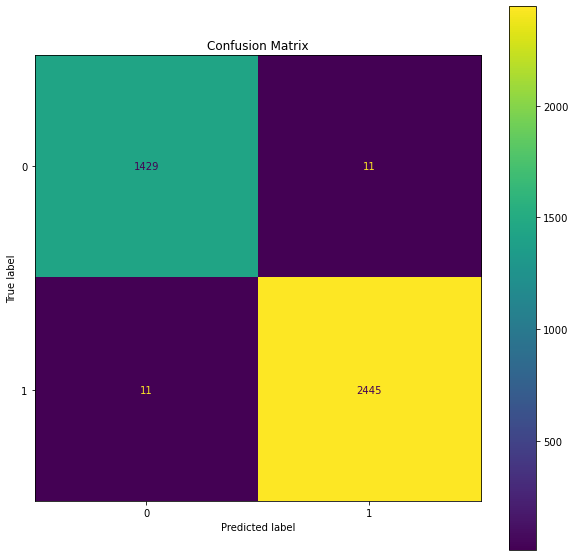

In [116]:
cm = confusion_matrix(y_test,pred)
classes = ["0","1"]
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=classes)
fig, ax = plt.subplots(figsize=(10,10))
plt.title("Confusion Matrix")
disp = disp.plot(ax=ax)
plt.show()

In [117]:
#define metrics for ROC curve
fpr, tpr, _ = metrics.roc_curve(y_test,  pred)

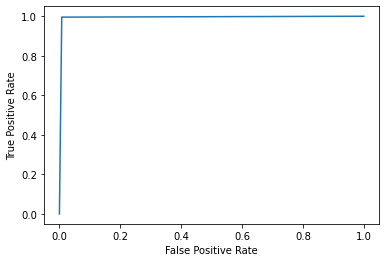

In [118]:
#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#The more that the curve hugs the top left corner of the plot,
#the better the model does at classifying the data into categories.

In [119]:
#define metrics for ROC and AUC
fpr, tpr, _ = metrics.roc_curve(y_test,  pred)
auc = metrics.roc_auc_score(y_test, pred)

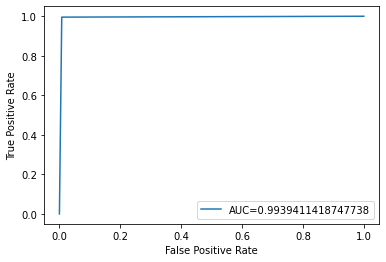

In [120]:
#create ROC curve with AUC
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()
#The closer AUC is to 1, the better the model.

Feature: 0, Score: 0.05541
Feature: 1, Score: 0.00566
Feature: 2, Score: 0.06915
Feature: 3, Score: 0.01269
Feature: 4, Score: 0.04694
Feature: 5, Score: 0.02600
Feature: 6, Score: 0.02208
Feature: 7, Score: 0.01051
Feature: 8, Score: 0.03796
Feature: 9, Score: 0.01846
Feature: 10, Score: 0.01157
Feature: 11, Score: 0.03568
Feature: 12, Score: 0.02340
Feature: 13, Score: 0.13338
Feature: 14, Score: 0.10174
Feature: 15, Score: 0.00168
Feature: 16, Score: 0.02125
Feature: 17, Score: 0.05582
Feature: 18, Score: 0.02599
Feature: 19, Score: 0.07865
Feature: 20, Score: 0.03642
Feature: 21, Score: 0.02428
Feature: 22, Score: 0.02813
Feature: 23, Score: 0.04323
Feature: 24, Score: 0.03372
Feature: 25, Score: 0.04022


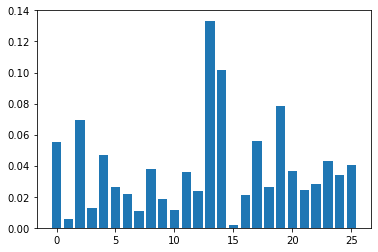

In [121]:
# get importance
importance = regrassor.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

#feature13=monthly income

In [122]:
df1.info() #to check number of features

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19478 entries, 0 to 19477
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       19478 non-null  int64
 1   BusinessTravel            19478 non-null  int64
 2   DailyRate                 19478 non-null  int64
 3   Department                19478 non-null  int64
 4   DistanceFromHome          19478 non-null  int64
 5   Education                 19478 non-null  int64
 6   EnvironmentSatisfaction   19478 non-null  int64
 7   Gender                    19478 non-null  int64
 8   HourlyRate                19478 non-null  int64
 9   JobInvolvement            19478 non-null  int64
 10  JobLevel                  19478 non-null  int64
 11  JobRole                   19478 non-null  int64
 12  MaritalStatus             19478 non-null  int64
 13  MonthlyIncome             19478 non-null  int64
 14  MonthlyRate               19478 non-nu

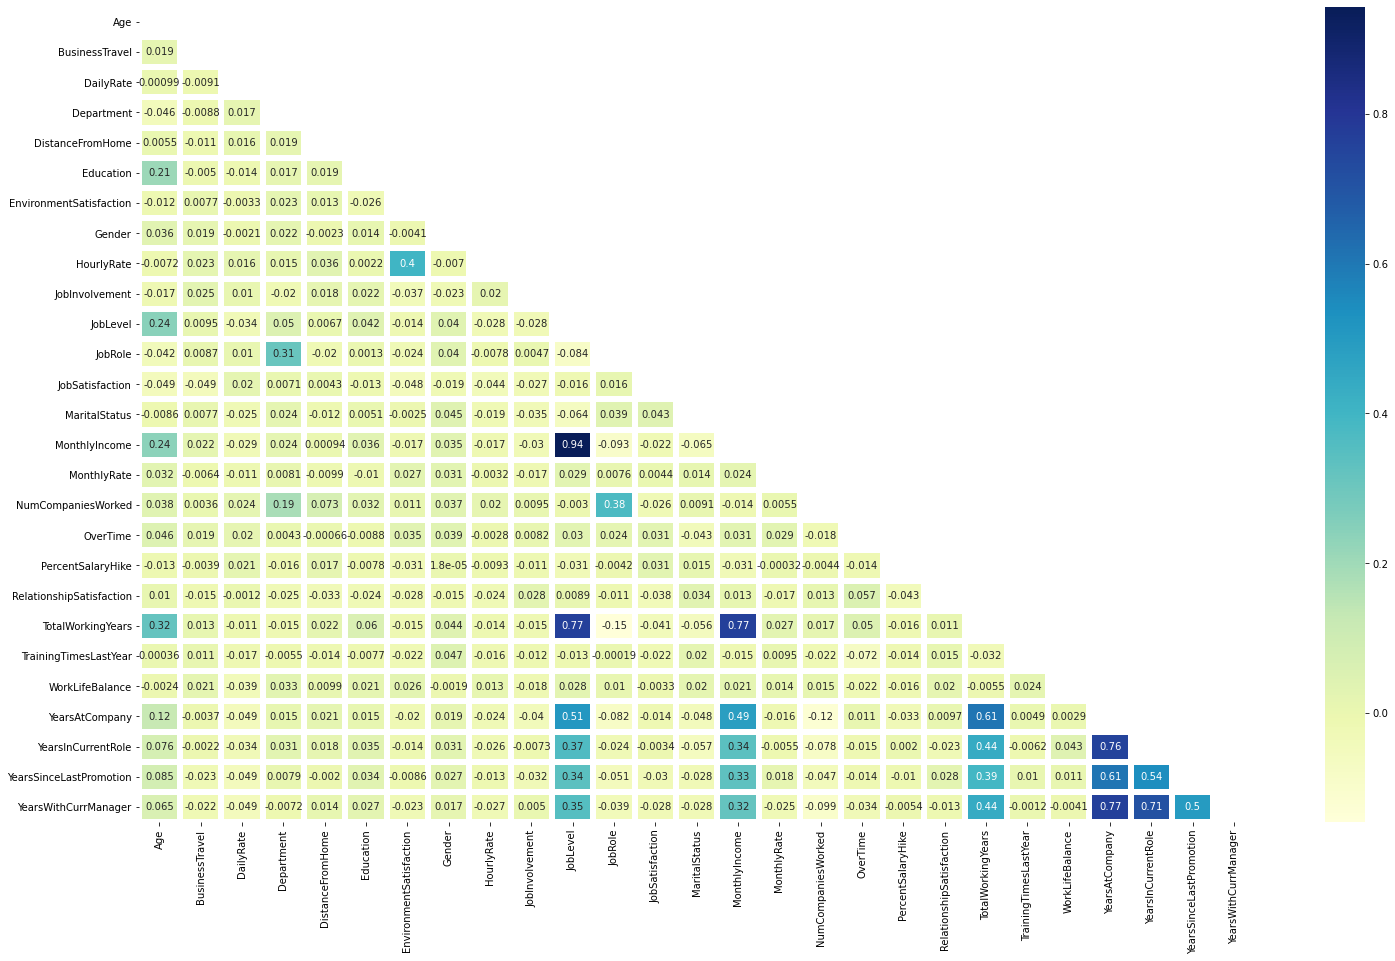

In [123]:
#visualization
plt.figure(figsize=(25,15))
sns.heatmap(df.corr(), mask=np.triu(df.corr()), annot=True, cmap='YlGnBu',linewidth=5)
plt.show()